# Brownian Motion
Consider a Filtered probability space $(\Omega, \mathcal{F}, \mathbb{P}, \{\mathcal{F}_t\}_{t \in [0,T]})$. A Brownian motion is a stochastic process ${\{W_t\}}_{t \in [0,T]}$. Brownian motion is a martingale and a Markov process and that it accumulates quadratic variation at rate one per unit time.

Let an adapted process $W: [0,T] \times \Omega \rightarrow \mathbb{R}$ be a Brownian motion. Then,

1. $W_0 = 0$ (Standard Brownian motion at time $t=0$ is zero).
2. $\mathbb{P}(W_t - W_s \in A|\mathcal{F}_s) = \mathbb{P}(W_t - W_s \in A)$ (W has independent increments) $\forall 0 < s < t, A \in \mathcal{B}(\mathbb{R})$.
3. $\mathbb{P}(W_t - W_s \in A) = \mathbb{P}(W_{t-s} \in A)$ (W has Stationary increments) $\forall 0 < s < t, A \in \mathcal{B}(\mathbb{R})$.
4. $W_t \sim N(0,t)$ (W has Gaussian increments).
5. $t \rightarrow W_t$ has continuous sample paths (almost surely).

Brownian Motion is continuous and nowhere differentiable, has no finite variation, but has finite quadratic variation $\langle W\rangle_t = t$.
(Thus, no Lebsgue-Stieltjes integral, but stochastic integral.)
A `d-dimension Brownian motion` $\mathbf{W} = (W^1,W^2,\dots,W^d)$ is such that each $W^i$ are 1-d Brownian motions and $W^i,W^j$ are independent $\forall i\ne j$.

### Symmmetric Random Walk
Assume we have a successive coin tosses, $\omega = \omega_1,\omega_2,\omega_3, \dots$ where $\omega_n$ is the outcome of the $n^{th}$ coin toss which could be either `Head` or `Tail`. The random variable $X_i$ takes the value of `1 if the outcome of coin toss is Head and -1 if its a tail`.

$$X_i =
\begin{cases}
    1                & \text{if } \omega_i = H\\
    -1               & \text{if } \omega_i = T\\
\end{cases}
$$

Define a process $M$ as summation along all possible coin toss paths with $M_0 = 0$ and

$$
M_k = \sum_{i=1}^{k}X_i
$$

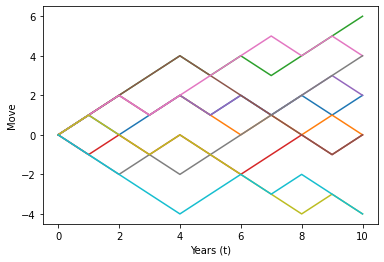

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Parameters
M = 10 # number of simulations
t = 10 # Time

random_walk = [-1, 1]
steps = np.random.choice(random_walk, size=(M,t)).T
origin = np.zeros((1,M))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

plt.plot(rw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

### Numerical Method
We will use **Monte carlo method** and **Euler scheme** to generate Brownian motion simulation. The Euler Scheme implemented is:
\begin{equation}
W_{(i+1)\Delta t} = W_{i\Delta t} + \sqrt{\Delta t}Z_i
\end{equation}
where $\Delta t = \frac{1}{n}$ and $\Delta t>0$ is the step size and $Z_i$ is a sequence of i.i.d. standard normal random variables $N(0,1)$. $n$ is the number of points.

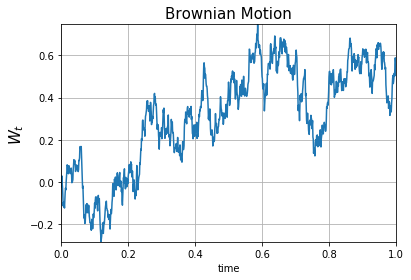

In [1]:
n = 1000    # Number of points.
dt = 1/n    # Step size.
sqrt_dt = np.sqrt(dt)

T = np.arange(0,1+dt,dt)
Z = np.zeros(T.size)
for i in np.arange(len(Z)):
    Z[i] = norm.ppf(np.random.uniform(0.0, 1.0))
delta = sqrt_dt * Z
W = np.zeros(T.size)
for i in np.arange(len(W)-1):
    W[i+1] = W[i] + delta[i+1]
    
    
plt.plot(T,W)
plt.xlabel('time',fontsize=10)
plt.ylabel(r'$W_{t}$',fontsize=15)
plt.title('Brownian Motion',fontsize=15)
plt.axis([min(T), max(T), min(W), max(W)])
plt.grid(True)
plt.show()